<a href="https://colab.research.google.com/github/edwin-isa/PCVK/blob/Jobsheet-7/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------------------------------------------------------------

# Pengolahan Citra dan Visi Komputer
**Praktikum Pertemuan 7- Filter Spasial Low Pass Filter, Hight Pass Filter, Point Detection, Line Detection, Edge Detection.**

- Nama  : Mohamad Edwin Isa Alfais
- NIM   : 2141720193
- Kelas : TI-3D

------------------------------------------------------------

## Praktikum

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:
*   Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.
*   Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

**a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.**

**b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

**c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.**

**Konvulasi tanpa library**
Membuat fungsi konvulasi
Fungsi konvolusi yang dibuat memiliki parameter berupa:
1. citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride / besarnya pergeseran untuk setiap konvolusi,
4. nilai pad yang akan ditambakan pada citra

In [3]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [4]:
img_m = cv.imread('/content/drive/Othercomputers/MacBook Pro Saya/College/Semester 5/PCVK/Pertemuan 3/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)


3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter

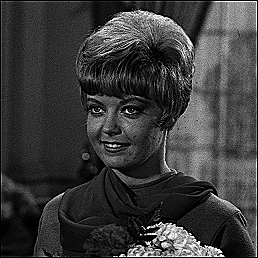

In [5]:
#Sharpen

kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

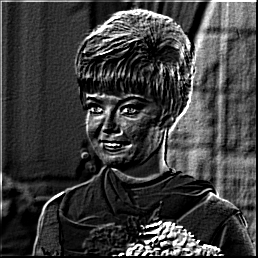

In [6]:
#Emboss

kernel_embos = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

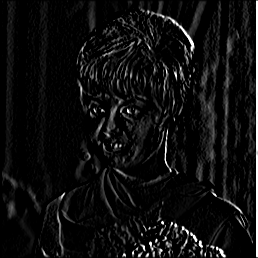

In [7]:
#Left Sobel Edge Detection

kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

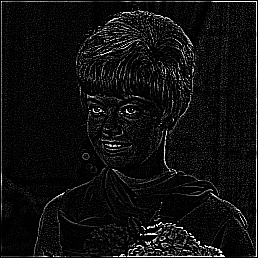

In [8]:
#Canny Edge Detection

kernel_edge = np.array([[-1, -1, -1],
                           [-1, 8, -1],                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

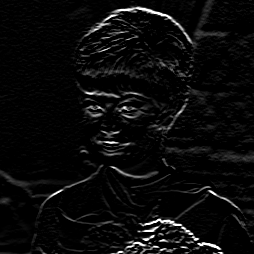

In [19]:
#Prewitt Edge Detection

kernel_prewitt = np.array([[-1, -1, -1],
                          [0, 0, 0],
                          [1, 1, 1]])

# Menjalankan konvolusi
edge_detected_image = convolution2d(img_gray, kernel_prewitt, 1, 2)

# Menampilkan hasil konvolusi
cv2_imshow(edge_detected_image)

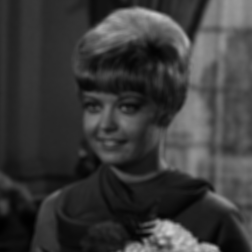

In [21]:
#5x5 Gaussian Blur

kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

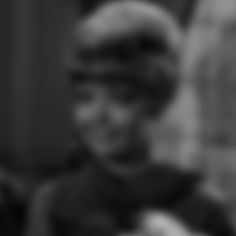

In [22]:
#21x21 Gaussian Blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

## Tugas

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP


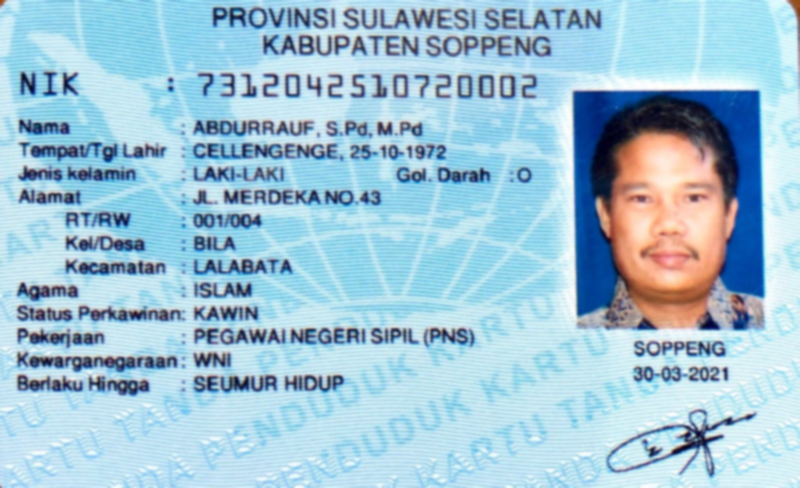

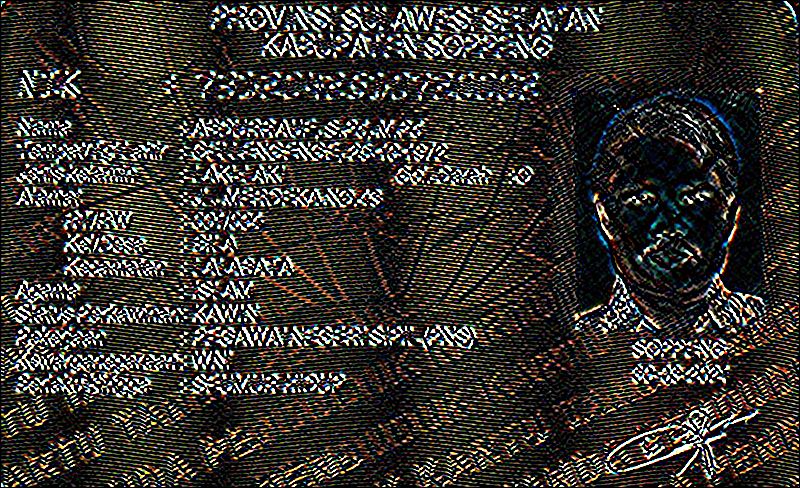

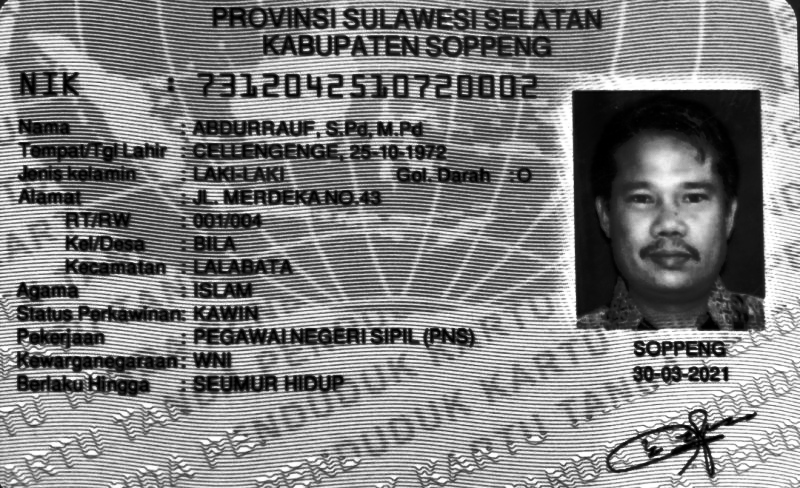

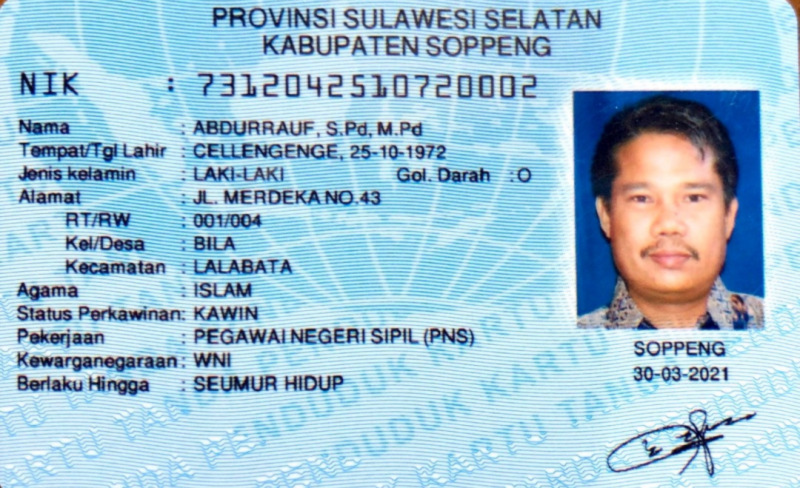

In [24]:
import cv2
import numpy as np

# Baca citra KTP
ktp_image = cv2.imread('/content/drive/Othercomputers/MacBook Pro Saya/College/Semester 5/PCVK/Pertemuan 7/KTP.jpeg', cv2.IMREAD_COLOR)

# 1. Filterisasi (contoh dengan filter Gaussian)
filtered_image = cv2.GaussianBlur(ktp_image, (5, 5), 0)

# 2. Deteksi tepi (contoh dengan filter Sobel)
edges = cv2.Sobel(ktp_image, cv2.CV_64F, 1, 1, ksize=5)

# 3. Histogram Equalization
gray_image = cv2.cvtColor(ktp_image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(gray_image)

# 4. Operasi Aritmatika (contoh dengan penambahan)
# Misalnya, tambahkan citra hasil filterisasi dengan citra asli
combined_image = cv2.addWeighted(ktp_image, 0.7, filtered_image, 0.3, 0)

# 5. Tampilkan citra-citra hasil
cv2_imshow(filtered_image)
cv2_imshow(edges)
cv2_imshow(equalized_image)
cv2_imshow(combined_image)